# Data Exploration

In [10]:
%pip install -U pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json

## Setup

In [12]:
path = "../data/pinglab-ICD11-data.json"

## Inital file loading

In [13]:
with open(path, "r") as fi:
    dict_data = json.load(fi)

print(dict_data[824])
print(len(dict_data))
print(dict_data[0].keys())

{'root': 'Symptoms, signs or clinical findings, not elsewhere classified', 'tree': 'Symptoms, signs or clinical findings, not elsewhere classified.Symptoms, signs or clinical findings of the respiratory system.Symptoms or signs involving the respiratory system.Cough.Nervous cough', 'name': 'Nervous cough', 'parents': ['Cough'], 'childs': [], 'sibls': ['Tussive syncope', 'Bronchial cough', 'Chronic cough', 'Nervous cough'], 'id': '756318818', 'degree': 5, 'definition': 'Key Not found', 'synonym': 'Key Not found'}
68579
dict_keys(['root', 'tree', 'name', 'parents', 'childs', 'sibls', 'id', 'degree', 'definition', 'synonym'])


## Main Exploration

### Data Loading

In [14]:
raw_df = pd.read_json(path)

### Inspection

We start off by looking at basic information about the data, such as the number of rows and columns, the data types of the columns, and the number of null values in each column.

In [15]:
raw_df.head()

,root,tree,name,parents,childs,sibls,id,degree,definition,synonym
0,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",[Key Not found],"[Symptoms, signs or clinical findings of blood...",[],1843895818,1,Clinical findings include those found using ph...,Key Not found
1,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings of blood,...","[Symptoms, signs or clinical findings, not els...","[Symptoms of blood, blood-forming organs, or t...","[Symptoms, signs or clinical findings of blood...",1994504557,2,Key Not found,Key Not found
2,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms of blood, blood-forming organs, or th...","[Symptoms, signs or clinical findings of blood...","[Fear of haematological disease, Symptom or co...","[Symptoms of blood, blood-forming organs, or t...",739755954,3,Key Not found,Key Not found
3,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Fear of haematological disease,"[Fear of disease, Symptoms of blood, blood-for...",[Fear of haematological cancer],"[Fear of cancer, Fear of human immunodeficienc...",588081624,4,Key Not found,Key Not found
4,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Fear of haematological cancer,"[Fear of cancer, Fear of haematological disease]",[],"[Fear of haematological cancer, Fear of cancer...",207258311,5,Key Not found,Key Not found


In [16]:
def inspect(df_):

    print(
        f"The dataset contains: \n\t--> {df_.shape[0]} rows \n\t--> {df_.shape[1]} columns."    
    )

    print(
        f"The columns are: \n\t--> {df_.columns.to_list()}\n"
    )

    print(
        raw_df.info()
    )

    for col_name in raw_df.columns.to_list():
        # get the top-3 most frequent values
        top_3 = raw_df[col_name].value_counts().head(3)
        # cut of for easier readings
        top_3 = top_3.apply(lambda x: str(x)[:50])

        print(f"Column: {col_name}")
        print(f"Top-3 values:\n{top_3}\n")



We start of by doing a general inspection using the function from above:

In [17]:
raw_df.head()

,root,tree,name,parents,childs,sibls,id,degree,definition,synonym
0,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",[Key Not found],"[Symptoms, signs or clinical findings of blood...",[],1843895818,1,Clinical findings include those found using ph...,Key Not found
1,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings of blood,...","[Symptoms, signs or clinical findings, not els...","[Symptoms of blood, blood-forming organs, or t...","[Symptoms, signs or clinical findings of blood...",1994504557,2,Key Not found,Key Not found
2,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms of blood, blood-forming organs, or th...","[Symptoms, signs or clinical findings of blood...","[Fear of haematological disease, Symptom or co...","[Symptoms of blood, blood-forming organs, or t...",739755954,3,Key Not found,Key Not found
3,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Fear of haematological disease,"[Fear of disease, Symptoms of blood, blood-for...",[Fear of haematological cancer],"[Fear of cancer, Fear of human immunodeficienc...",588081624,4,Key Not found,Key Not found
4,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Fear of haematological cancer,"[Fear of cancer, Fear of haematological disease]",[],"[Fear of haematological cancer, Fear of cancer...",207258311,5,Key Not found,Key Not found


In [18]:
inspect(raw_df)

The dataset contains: 
	--> 68579 rows 
	--> 10 columns.
The columns are: 
	--> ['root', 'tree', 'name', 'parents', 'childs', 'sibls', 'id', 'degree', 'definition', 'synonym']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68579 entries, 0 to 68578
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   root        68579 non-null  object
 1   tree        68579 non-null  object
 2   name        68579 non-null  object
 3   parents     68579 non-null  object
 4   childs      68579 non-null  object
 5   sibls       68579 non-null  object
 6   id          68579 non-null  int64 
 7   degree      68579 non-null  int64 
 8   definition  68579 non-null  object
 9   synonym     68579 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.2+ MB
None
Column: root
Top-3 values:
root
Special Views                                                         4190
Extension Codes                                                       41

Based of this, we look into the degree column by plotting a histogram of the values.

Text(0, 0.5, 'Frequency')

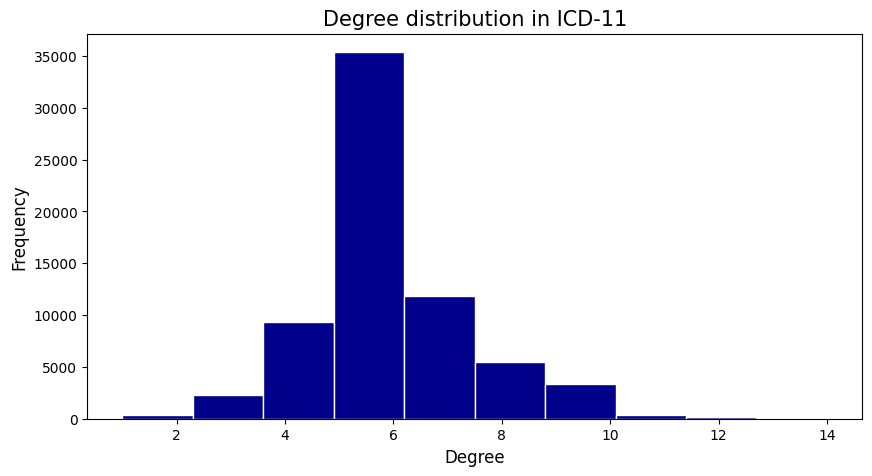

In [35]:
raw_df.degree.hist(
    bins=10,
    figsize=(10, 5),
    grid=False,
    color="darkblue",
    edgecolor="white",
    linewidth=1.0,
    xlabelsize=10,    
)

plt.title("Degree distribution in ICD-11", fontsize=15)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Frequency",fontsize=12)

This looks alright - we will for now not do anything with this column.

Now, we look at the distribution of the data including NA values. To do so, we have to introduce NA by identifying the missing values in the data/the specific values for missing values. We then replace these values with NA and plot the distribution of the data.

In [20]:
na_value = "Key Not found"
def na_inspect(df_):
    potential_nas = ['sibls', "definition", 'synonym']    
    total_values = df_.shape[0]

    for col_name in potential_nas:
        # count the number of missing values
        na_count = df_.query(f"{col_name} == '{na_value}'").shape[0]
        na_ratio = na_count / total_values
        print(f"Column: {col_name}")
        print(f"Number of missing values: {na_count}")
        print(f"Ratio of missing values: {na_ratio:.3f}\n")


        # df[col_name] = df[col_name].replace(na_value, np.nan)

We use the function from above to inspect the NA values in the data. Based on our ealier analysis we only look into three columns.

In [21]:
na_inspect(raw_df)

Column: sibls
Number of missing values: 7159
Ratio of missing values: 0.104

Column: definition
Number of missing values: 42300
Ratio of missing values: 0.617

Column: synonym
Number of missing values: 48680
Ratio of missing values: 0.710



We drop all rows where the definition is missing, as we cannot use them for training.

In [22]:
df = raw_df.copy()

In [23]:
# drop rows where definition == "Key Not found"
df = df.query(f"definition != '{na_value}'")

Now we do a second round of general inspection for our new, smaller dataset to how this has changed the data.

In [24]:
df.head()

,root,tree,name,parents,childs,sibls,id,degree,definition,synonym
0,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",[Key Not found],"[Symptoms, signs or clinical findings of blood...",[],1843895818,1,Clinical findings include those found using ph...,Key Not found
6,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Enlarged lymph nodes,"[General symptoms, Symptoms of blood, blood-fo...","[Localised lymph node enlargement, Generalised...","[Abiotrophy, Autointoxication, Autotoxaemia, C...",1564691570,4,Enlarged lymph node is called lymphadenopathy ...,"[swollen glands, Lymphadenopathy, adenopathy, ..."
40,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Abnormal level of lead in blood,[Finding of abnormal level of heavy metals in ...,[],[Abnormal level of lead in blood],1183434772,6,Abnormal level of lead in blood in those who h...,Key Not found
66,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Bacteraemia,[Septicaemia],[Staphylococcus aureus bacteraemia],[Bacteraemia],770483821,6,The presence of bacteria in the blood. A posit...,Key Not found
80,"Symptoms, signs or clinical findings, not else...","Symptoms, signs or clinical findings, not else...",Plasmacytosis,[Elevated white blood cell count],[],"[Plasmacytosis, Leukaemoid reaction, Basophili...",918298325,7,An unusually large amount of plasma cells in t...,Key Not found


In [25]:
inspect(df)

The dataset contains: 
	--> 26279 rows 
	--> 10 columns.
The columns are: 
	--> ['root', 'tree', 'name', 'parents', 'childs', 'sibls', 'id', 'degree', 'definition', 'synonym']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68579 entries, 0 to 68578
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   root        68579 non-null  object
 1   tree        68579 non-null  object
 2   name        68579 non-null  object
 3   parents     68579 non-null  object
 4   childs      68579 non-null  object
 5   sibls       68579 non-null  object
 6   id          68579 non-null  int64 
 7   degree      68579 non-null  int64 
 8   definition  68579 non-null  object
 9   synonym     68579 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.2+ MB
None
Column: root
Top-3 values:
root
Special Views                                                         4190
Extension Codes                                                       41

Next, we look at how our NA values and ratio have changed.

In [26]:
na_inspect(df)

Column: sibls
Number of missing values: 0
Ratio of missing values: 0.000

Column: definition
Number of missing values: 0
Ratio of missing values: 0.000

Column: synonym
Number of missing values: 14790
Ratio of missing values: 0.563



In [27]:
df.name.unique().shape

(13136,)

In [28]:
df.definition.unique().shape

(12916,)

In [29]:
# print name and definition of the first 10 entries:
for i in df.index[1:10]:
    print(f"Name: {df.name[i]}")
    print(f"Definition: {df.definition[i]}\n")

Name: Enlarged lymph nodes
Definition: Enlarged lymph node is called lymphadenopathy which means the abnormal enlargement of lymph nodes.

Name: Abnormal level of lead in blood
Definition: Abnormal level of lead in blood in those who have been exposed to lead and who require management.

Name: Bacteraemia
Definition: The presence of bacteria in the blood. A positive blood culture without signs of infection.

Name: Plasmacytosis
Definition: An unusually large amount of plasma cells in tissues, exudates or blood.

Name: Basophilia
Definition: A condition in which there is an abnormal increase in the number of basophils in the blood.

Name: Bandaemia
Definition: An excess of immature white blood cells in the blood which signifies an infection or inflammation.

Name: Abnormal glucose tolerance test
Definition: Greater than normal levels of glucose found in laboratory examination of the blood to check how the body breaks down (metabolizes) blood sugar. Positive findings may indicate diabete